<a href="https://colab.research.google.com/github/Mardugo/ClaseMachineLearning/blob/main/BaseDatosOro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ORO!!! Forecasting

In [84]:
## Importando las librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [85]:
dataframeGold = pd.read_csv('gold_price_data.csv')
print(dataframeGold.columns)
dataframeGold.describe()

Index(['Date', 'Value'], dtype='object')


Value
count  10787.000000
mean     653.596634
std      434.030848
min       35.100000
25%      349.200000
50%      409.350000
75%     1061.625000
max     1895.000000

In [86]:
print(dataframeGold.dtypes)
dataframeGold.head(10)

Date      object
Value    float64
dtype: object


Date  Value
0  1970-01-01   35.2
1  1970-04-01   35.1
2  1970-07-01   35.4
3  1970-10-01   36.2
4  1971-01-01   37.4
5  1971-04-01   38.9
6  1971-07-01   40.1
7  1971-10-01   42.0
8  1972-01-03   43.5
9  1972-04-03   48.3

In [87]:
etiqueta = np.array(dataframeGold['Value'])[2:]
car_m1 = np.array(dataframeGold['Value'])[1:-1]
car_m2 = np.array(dataframeGold['Value'])[:-2]
print(len(etiqueta))
print(len(car_m1))
print(len(car_m2))

10785
10785
10785


In [88]:
## Agrupando los datos en un único Dataframe y exportándolo a un archivo CSV
dataset = pd.DataFrame({'Carac menos 2':car_m2, 'Carac menos 1':car_m1, 'Etiqueta':etiqueta})
dataset.to_csv('goldPriceArranged.csv')

In [89]:
## Pasando los datos a una matriz de tipo numpy
matrizDatos = dataset.to_numpy()
print(matrizDatos.shape)
print(matrizDatos)

(10785, 3)
[[  35.2    35.1    35.4 ]
 [  35.1    35.4    36.2 ]
 [  35.4    36.2    37.4 ]
 ...
 [1672.5  1655.7  1653.75]
 [1655.7  1653.75 1570.7 ]
 [1653.75 1570.7  1562.8 ]]


In [90]:
def hypothesis_gold(theta_0, theta_1, x0, x1):
    return theta_0 * x0 + theta_1 * x1

def cost_gold(parametros, carac0, carac1, labels):
    aux = ((hypothesis_gold(parametros[0], parametros[1], carac0,carac1)-labels)**2)
    return np.sum(aux)/(2*len(carac0))


def grid_search_parameters_gold(carac0, carac1, labels):
    min_j, min_aux, theta_0_min, theta_1_min = 99999, 0, 0, 0 
    for i in np.arange(-2,2,0.1):
        for j in np.arange(-2,2,0.1):
            min_aux = cost_gold(np.array([i, j]),carac0, carac1, labels)
            if(min_aux < min_j):
                min_j, theta_0_min, theta_1_min = min_aux, i, j
    return np.array([theta_0_min, theta_1_min])

In [91]:
carac0 = dataset['Carac menos 2']
carac1 = dataset['Carac menos 1']
labels = dataset['Etiqueta']

theta = grid_search_parameters_gold(carac0, carac1, labels)

print("Funcion de costo =",cost_gold(theta, carac0, carac1, labels), "theta_0:", theta[0],"thetha_1:", theta[1])

Funcion de costo = 40.808982642558796 theta_0: 1.7763568394002505e-15 thetha_1: 1.0000000000000027


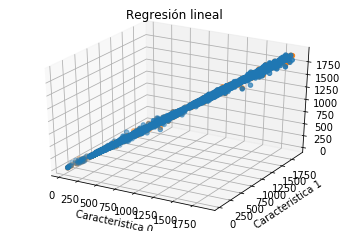

In [92]:
labels_estimator = np.array([])

for i, j in zip(carac0,carac1):
    labels_estimator = np.append(labels_estimator, hypothesis_gold(theta[0], theta[1], i, j))

fig = plt.figure() 
axug = fig.add_subplot(projection='3d') 
axug.scatter(carac0, carac1, labels, label='Datos') 
axug.scatter(carac0, carac1, labels_estimator, label='Datos') 
plt.xlabel('Caracteristica 0') 
plt.ylabel('Caracteristica 1') 
plt.title('Regresión lineal') 
plt.show() 